In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf

In [3]:
plt.rcParams["figure.figsize"] = (12,12)

In [4]:
import sys
import glob

In [5]:
sys.path.append('../')

In [6]:
from bbox_utils.bbox import generate_default_boxes, generate_default_boxes, rotateRectangle
from src.config import *

In [7]:
from bbox_utils.numbaClipping import getIOU, getIOUOverallDefaultBox, shoelaceFormula

In [8]:
# Blue color in BGR
color = (255, 0, 0)
 
# Line thickness of 2 px
thickness = 1

In [152]:
prior_boxes, prior_boxes_coco, prior_box_area = generate_default_boxes(feature_map_shapes, 6, aspect_ratios, angles)

prior_boxes = np.array(prior_boxes, dtype=np.float64) * 300

prior_boxes_coco = np.array(prior_boxes_coco, dtype=np.float64)

prior_boxes_coco[:, :4] = prior_boxes_coco[:, :4] * 300

In [153]:
# prior_box_area = prior_box_area * 300 * 300

In [154]:
print(len(prior_boxes_coco))
len(prior_boxes) == len(prior_boxes_coco)

31044


True

In [53]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000082242.txt') as f:
    data = f.readlines()

In [54]:
data = data[0].split(',')
gt_box = list(map(float, data))
gt_box = gt_box[1:]

In [55]:
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000082242.jpg')

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


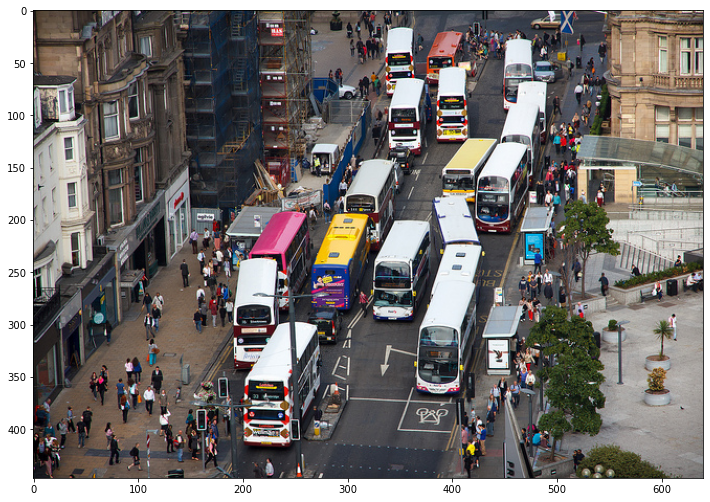

In [56]:
plt.imshow(image)

In [57]:
# for i in range(0, 8, 2):
#     gt_box[i] = gt_box[i] / height

# for i in range(1, 8, 2):
#     gt_box[i] = gt_box[i] / width

In [58]:
gt_box

[335.25327,
 139.89955,
 348.9061,
 122.04585,
 373.21835,
 140.63756,
 359.56552,
 158.49126]

In [59]:
gt_box = [0.523058530183727, 0.65878784, 0.6034454068241469, 0.5107554, 0.7110888976377953, 0.54469654, 0.6307020209973754, 0.692729]

In [60]:
np.array(gt_box) * 300

array([156.91755906, 197.636352  , 181.03362205, 153.22662   ,
       213.32666929, 163.408962  , 189.2106063 , 207.8187    ])

[[0.52305853 0.65878784]
 [0.60344541 0.5107554 ]
 [0.7110889  0.54469654]
 [0.63070202 0.692729  ]]


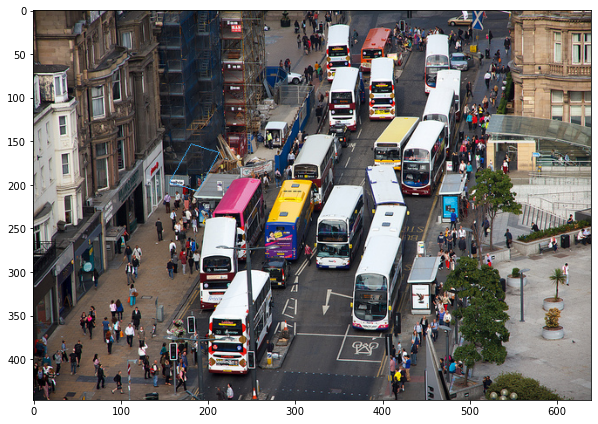

In [61]:
gt_box = np.array(gt_box)

gt_box = gt_box.reshape(4, 2)

gt_box_area = shoelaceFormula(gt_box)

prior_boxes= np.array(prior_boxes, dtype=np.float64)

for i in range(len(prior_boxes)):
    
    iou = getIOU(prior_boxes[i], gt_box, gt_box_area)
    
    if iou > 0.5:
    
        corners = np.array(prior_boxes[i]) * 300

        corners = corners.astype(np.int32)

        corners = corners.reshape(4, 2)

        corners = corners.reshape((-1, 1, 2))

        image = cv2.polylines(image, [corners],
                              True, color, 1)

        
corners = np.array(gt_box) * 300

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (52, 164, 235), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [62]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000082242.txt') as f:
    data = f.readlines()
    
print(data)

['3,335.25327,139.89955,348.9061,122.04585,373.21835,140.63756,359.56552,158.49126\n', '3,478.0,69.0,478.0,48.0,499.0,48.0,499.0,69.0\n', '1,108.58365,312.33847,117.486374,311.78207,119.16731,338.67703,110.26459,339.23343\n', '1,87.0,331.0,95.0,331.0,95.0,354.0,87.0,354.0\n', '1,90.941185,331.7647,100.58825,329.35297,107.41178,356.6471,97.76472,359.05884\n', '1,110.418045,339.59836,123.581985,338.40164,126.22133,367.43442,113.05739,368.63113\n', '1,72.0,434.99997,74.48967,403.87912,86.33386,404.82663,83.84419,435.94748\n', '1,119.0,385.0,119.0,361.0,128.0,361.0,128.0,385.0\n', '1,39.347095,387.49167,50.307697,386.53854,53.005634,417.5648,42.045033,418.5179\n', '1,536.25543,252.45253,545.97076,248.9197,554.1751,271.48175,544.4598,275.0146\n', '1,68.0,421.0,68.0,393.0,77.0,393.0,77.0,421.0\n', '1,82.04617,367.36923,90.53848,366.3077,93.87694,393.0154,85.38463,394.07693\n', '1,504.0,137.0,504.0,118.0,509.0,118.0,509.0,137.0\n', '3,260.14215,319.44568,261.64856,281.78595,296.39294,283.1757

In [21]:
gt_box

array([[0.52305853, 0.65878784],
       [0.60344541, 0.5107554 ],
       [0.7110889 , 0.54469654],
       [0.63070202, 0.692729  ]])

In [22]:
def shoelaceFormula(coordinates):
    print(coordinates)
    if len(coordinates) < 3:
        return np.float64(0)
    
    area = 0

    for i in range(len(coordinates)):
        i_plus_1 = (i + 1) % len(coordinates)
        area += (coordinates[i_plus_1][0] * coordinates[i][1] - coordinates[i][0] * coordinates[i_plus_1][1])

    return np.float64(abs(area) / 2)

In [107]:
from bbox_utils.numbaClipping import getIOUOverallDefaultBox

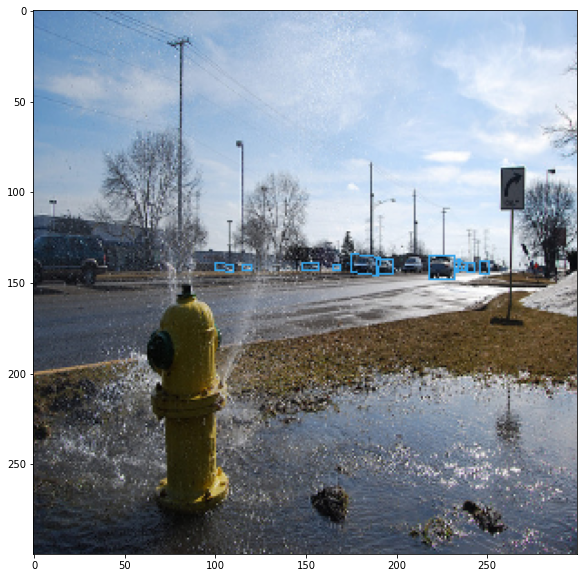

In [112]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000021782.txt') as f:
    datas = f.readlines()
    
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000021782.jpg')

with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000021782.txt.coco_theta') as f:
    cocos = f.readlines()

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.resize(image, (300, 300))

for i in range(len(datas)):
    data = datas[i].split(',')
    gt_box = list(map(float, data))
    gt_box = gt_box[1:]
    
    for k in range(0, 8, 2):
        gt_box[k] = gt_box[k] / height

    for k in range(1, 8, 2):
        gt_box[k] = gt_box[k] / width

    gt_box = np.array(gt_box, dtype=np.float64) * 300
    
    coco = cocos[i].split(',')
    gt_boxes_coco = list(map(float, coco))
    gt_boxes_coco = gt_boxes_coco[1:]
    
    gt_boxes_coco[0], gt_boxes_coco[2] = gt_boxes_coco[0] / height, gt_boxes_coco[2] / width
    gt_boxes_coco[1], gt_boxes_coco[3] = gt_boxes_coco[1] / height, gt_boxes_coco[3] / width
    
    gt_boxes_coco = np.array(gt_boxes_coco)
    
    gt_boxes_coco[:4] = gt_boxes_coco[:4] * 300
    
    
    result = getIOUOverallDefaultBox(prior_boxes, gt_box, prior_boxes_coco, gt_boxes_coco, prior_box_area)
    
    for j in range(len(result)):

        if result[j] > 0.5:

            corners = np.array(prior_boxes[j])

            corners = corners.astype(np.int32)

            corners = corners.reshape(4, 2)

            corners = corners.reshape((-1, 1, 2))

            image = cv2.polylines(image, [corners],
                                  True, color, 1)

        
    corners = np.array(gt_box)

    corners = corners.astype(np.int32)

    corners = corners.reshape(4, 2)

    corners = corners.reshape((-1, 1, 2))

    image = cv2.polylines(image, [corners],
                          True, (52, 164, 235), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [114]:
IOU_map = np.zeros((1, len(prior_boxes), len(gt_boxes)))
gt_boxes = np.array(gt_boxes, np.float32)
gt_boxes_coco = np.array(gt_boxes_coco, np.float32)

for i in range(len(gt_boxes)):
    print('gt: ', gt_boxes[i])
    print('gt_box: ', gt_boxes_coco[i])
    IOU_map[:, :, i] = getIOUOverallDefaultBox( prior_boxes, gt_boxes[i], prior_boxes_coco, gt_boxes_coco[i], prior_box_area )


NameError: name 'gt_boxes' is not defined

In [113]:
tf.math.argmax(IOU_map, axis = 1)

NameError: name 'IOU_map' is not defined

In [110]:
c_x = gt_boxes_coco[0]
c_y = gt_boxes_coco[1]
rot_angle = gt_boxes_coco[4]

if rot_angle >= -0.7853981633974483 and rot_angle <= 0.7853981633974483: # 45 deg in rad
    width = gt_boxes_coco[2]
    height = gt_boxes_coco[3]
else:
    width = gt_boxes_coco[3]
    height = gt_boxes_coco[2]
    
left_limit = c_x - 1.5 * width
right_limit = c_x + 1.5 * width
c_x_in_bound = np.where(
    (prior_boxes_coco[:,0 ] >= left_limit) & (prior_boxes_coco[:,0 ] <= right_limit), True, False)

up_limit = c_y - 1.5 * height
down_limit = c_y + 1.5 * height
c_y_in_bound = np.where(
    (prior_boxes_coco[:,1 ] >= up_limit) & (prior_boxes_coco[:,1 ] <= down_limit), True, False)

c_in_bound = np.logical_and(c_x_in_bound, c_y_in_bound)

gt_box = gt_box.reshape(4, 2)
gt_area = shoelaceFormula(gt_box)

# if the gt_area is smaller than the smallest anchorbox
min_d_area =  np.min(prior_box_area)
if gt_area < min_d_area:
    low = 0
    high = (min_d_area / gt_area) * 2
else:
    low = 0.4
    high = 2.5

area_bound = np.where( (prior_box_area >= low * gt_area) & (prior_box_area <= high * gt_area), True, False)

in_bound = np.logical_and(c_in_bound, area_bound)

idx = np.argwhere(in_bound)

iou = np.zeros(len(prior_boxes), dtype = np.float64)

for i in range(len(idx)):
    iou[idx[i][0]] = getIOU(prior_boxes[idx[i][0]], gt_box, gt_area)

[[135.91217813  55.92236644]
 [137.0017125   46.56266443]
 [145.21115625  48.52167114]
 [144.12162656  57.88136913]]


In [111]:
np.max(iou)

0.1371047759921847

In [ ]:
datas

In [ ]:
x = [587.18286,328.64633,602.2195,326.97562,604.62195,348.59756,589.5853,350.26828]

width = ( max(x[0], x[2], x[4], x[6]) + min(x[0], x[2], x[4], x[6]) ) / 2

height = ( max(x[1], x[3], x[5], x[7]) + min(x[1], x[3], x[5], x[7]) ) / 2

width, height

In [ ]:
width / height

In [ ]:
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000001390.jpg')

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

corners = np.array(x)

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, color, 2)

plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
result = getIOUOverallDefaultBox(prior_boxes, gt_box)

In [ ]:
result

In [ ]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000000036.txt') as f:
    data = f.readlines()
    
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000000036.jpg')

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.resize(image, (300, 300))

data = data[0].split(',')
gt_box = list(map(float, data))
gt_box = gt_box[1:]

for i in range(0, 8, 2):
    gt_box[i] = gt_box[i] / height

for i in range(1, 8, 2):
    gt_box[i] = gt_box[i] / width
    
gt_box = np.array(gt_box)

gt_box = gt_box.reshape(4, 2)

prior_boxes= np.array(prior_boxes, dtype=np.float64)

for i in range(1000, 1050, 1):
    corners = np.array(prior_boxes[i])

    corners = corners.astype(np.int32)

    corners = corners.reshape(4, 2)

    corners = corners.reshape((-1, 1, 2))

    image = cv2.polylines(image, [corners],
                          True, color, 1)

        
corners = np.array(gt_box) * 300

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (52, 164, 235), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
np.array(prior_boxes[i])

In [ ]:
x[:-1]

In [ ]:
number_of_feature_maps = 6
def calculate_scale_of_default_boxes(k, m, s_max = 0.95, s_min = 0.2):
    return s_min + (s_max - s_min) * (k - 1) / (m - 1)

for k, f_k in enumerate(feature_map_shapes):
    s_k = calculate_scale_of_default_boxes(k, m = number_of_feature_maps, s_max = 0.8, s_min = 0.2)
    print(s_k)
    s_k_prime = np.sqrt(abs(s_k * calculate_scale_of_default_boxes(k + 1, m = 6)))

In [ ]:
prior_boxes = []

cx = 0.5
cy = 0.5

s_max = 0.7
s_min = 0.03

for k, f_k in enumerate(feature_map_shapes):
    if k == 1:
        s_k = calculate_scale_of_default_boxes(k + 1, m = number_of_feature_maps, s_max=s_max, s_min=s_min)
        s_k_prime = np.sqrt(s_k * calculate_scale_of_default_boxes(k + 1, m = number_of_feature_maps, 
                                                                   s_max=s_max, s_min=s_min))

         # for the square box don't rotate by 90
#         for angle in angles[:-1]:
#             prior_boxes.append(rotateRectangle(cx, cy, s_k, s_k, angle, 'deg'))
#             prior_boxes.append(rotateRectangle(cx, cy, s_k_prime, s_k_prime, angle, 'deg'))

#         for angle in angles:
#             prior_boxes.append(rotateRectangle(cx, cy, s_k, s_k_prime, angle, 'deg'))

        for ar in aspect_ratios[k]:
            for angle in [0]:
                prior_boxes.append(rotateRectangle(cx, cy, s_k*np.sqrt(ar), s_k/np.sqrt(ar), angle, 'deg'))
                prior_boxes.append(rotateRectangle(cx, cy, s_k_prime*np.sqrt(ar), s_k_prime/np.sqrt(ar), angle, 'deg'))
            
prior_boxes = np.array(prior_boxes) * 300

In [ ]:
len(prior_boxes)

In [ ]:
image = np.zeros((300, 300, 3))

for corners in prior_boxes:
    corners = corners.astype(np.int32)

    corners = corners.reshape(4, 2)

    corners = corners.reshape((-1, 1, 2))

    image = cv2.polylines(image, [corners],
                          True, color, 1)
    
plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000063893.txt') as f:
    gt_boxes = f.readlines()
    
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000063893.txt.coco_theta') as f:
    gt_boxes_coco = f.readlines()

In [155]:
from data_pipeline.getData import read_data, resize_images_and_labels

In [263]:
image, labelled_gt_box_coords, labelled_gt_coco = read_data('COCO_train2014_000000021782', 
                                      '/Users/usmanr/fiftyone/coco-2014/train/data/', 
                                      '/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/', 
                                      '.jpg')

In [264]:
prior_boxes, prior_boxes_coco, prior_box_area = generate_default_boxes(feature_map_shapes, 6, aspect_ratios, angles)

prior_boxes = np.array(prior_boxes, dtype=np.float64)

prior_boxes_coco = np.array(prior_boxes_coco, dtype=np.float64)

prior_boxes_coco[:, :4] = prior_boxes_coco[:, :4]

In [265]:
labelled_gt_box_coords[0]

[3, 214.0, 205.0, 214.25113, 199.72626, 235.25113, 200.72626, 235.0, 206.0]

In [266]:
image, labelled_gt_box_coords, labelled_gt_coco = resize_images_and_labels(image, 
                                                                           labelled_gt_box_coords, 
                                                                           labelled_gt_coco, 
                                                                           300, 300)

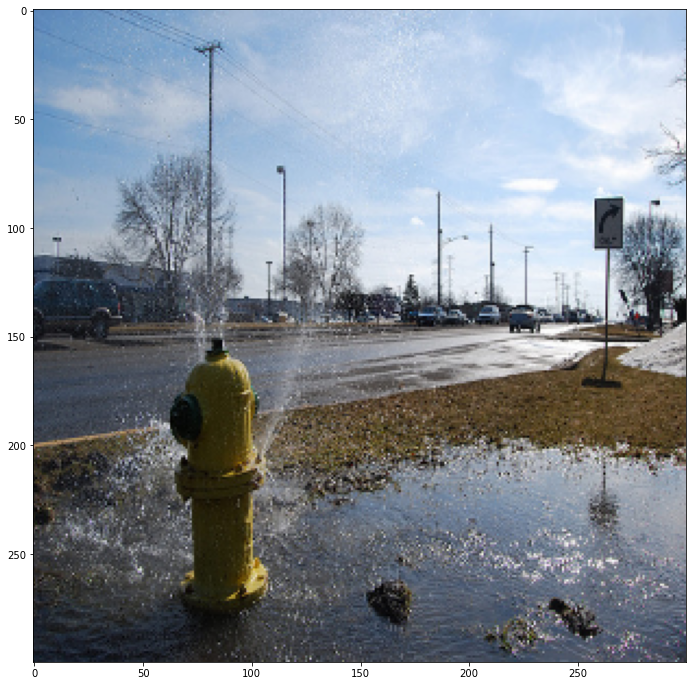

In [267]:
plt.imshow(image)

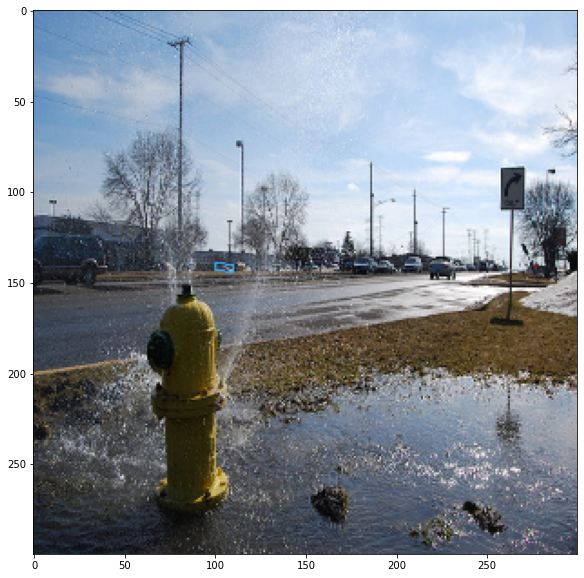

In [268]:
corners = np.array(labelled_gt_box_coords[0][1:])

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (52, 164, 235), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [269]:
labels_map = {1: 1, 3: 2, 17: 3, 18: 4}

In [270]:
gt_labels = [labels_map[l[0]] for l in labelled_gt_box_coords]
gt_boxes_normalized = [l[1:] for l in labelled_gt_box_coords]
gt_boxes_coco = [l[1:] for l in labelled_gt_coco]

In [281]:
gt_boxes_normalized[0]

[100.3125,
 143.69158878504672,
 100.4302171875,
 139.99504205607477,
 110.27396718749999,
 140.695976635514,
 110.15625,
 144.39252336448598]

In [272]:
prior_boxes, prior_boxes_coco, prior_box_area = generate_default_boxes(feature_map_shapes, 6, aspect_ratios, angles)

prior_boxes = np.array(prior_boxes, dtype=np.float64) * 300

prior_boxes_coco = np.array(prior_boxes_coco, dtype=np.float64)

prior_boxes_coco[:, :4] = prior_boxes_coco[:, :4] * 300

In [273]:
gt_boxes_coco_0 = np.array(gt_boxes_coco[0])
prior_box_area = np.array(prior_box_area)

prior_box_area = prior_box_area * 300 * 300

In [274]:
prior_box_area[8000]

910.735966128493

In [318]:
height

2.4748668227885635

In [276]:
c_x = gt_boxes_coco_0[0]
c_y = gt_boxes_coco_0[1]
rot_angle = gt_boxes_coco_0[4]

if rot_angle >= -0.7853981633974483 and rot_angle <= 0.7853981633974483: # 45 deg in rad
    width = gt_boxes_coco_0[2]
    height = gt_boxes_coco_0[3]
else:
    width = gt_boxes_coco_0[3]
    height = gt_boxes_coco_0[2]

left_limit = c_x - 1.5 * width
right_limit = c_x + 1.5 * width
c_x_in_bound = np.where(
    (prior_boxes_coco[:,0 ] >= left_limit) & (prior_boxes_coco[:,0 ] <= right_limit), True, False)

up_limit = c_y - 5 * height
down_limit = c_y + 5 * height
c_y_in_bound = np.where(
    (prior_boxes_coco[:,1 ] >= up_limit) & (prior_boxes_coco[:,1 ] <= down_limit), True, False)

c_in_bound = np.logical_and(c_x_in_bound, c_y_in_bound)

gt_box = gt_box.reshape(4, 2)
gt_area = width * height

# if the gt_area is smaller than the smallest anchorbox
min_d_area =  np.min(prior_box_area)
if gt_area < min_d_area:
    low = 0
    high = (min_d_area / gt_area) * 2
else:
    low = 0.4
    high = 2.5

area_bound = np.where( (prior_box_area >= low * gt_area) & (prior_box_area <= high * gt_area), True, False)

in_bound = np.logical_and(c_in_bound, area_bound)

idx = np.argwhere(in_bound)

In [277]:
idx

array([[6510],
       [6511],
       [6512],
       [6513],
       [6514],
       [6515],
       [6516],
       [6517],
       [6518],
       [6519],
       [6520],
       [6521],
       [6522],
       [6523],
       [6524],
       [6525],
       [6526],
       [6527],
       [6528],
       [6529],
       [6530],
       [6531],
       [6532],
       [6533],
       [6534],
       [6535],
       [6536],
       [6537],
       [6538],
       [6539],
       [6540],
       [6541],
       [6542],
       [6543],
       [6544],
       [6545],
       [6546],
       [6547],
       [6548],
       [6549],
       [6550],
       [6551],
       [6552],
       [6553],
       [6554],
       [6555],
       [6556],
       [6557],
       [6558],
       [6559],
       [6560],
       [6561],
       [6562],
       [6563],
       [6564],
       [6565],
       [6566],
       [6567],
       [6568],
       [6569],
       [7080],
       [7081],
       [7082],
       [7083],
       [7084],
       [7085],
       [70

In [279]:
gt_box

array([[246.09375   , 145.09345794],
       [246.09375   , 138.08411215],
       [251.25      , 138.08411215],
       [251.25      , 145.09345794]])

In [259]:
getIOU(prior_boxes[7124], gt_box, gt_area)

0.0

In [261]:
gt_box

array([[246.09375   , 145.09345794],
       [246.09375   , 138.08411215],
       [251.25      , 138.08411215],
       [251.25      , 145.09345794]])

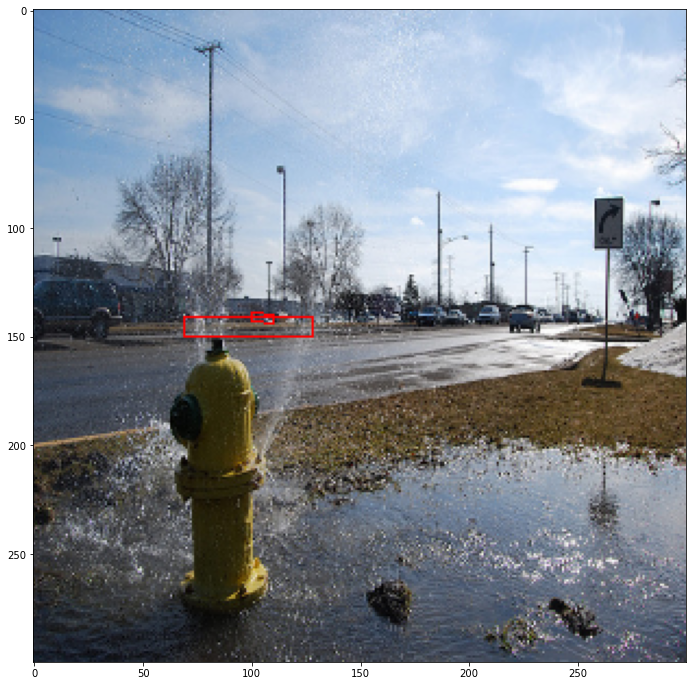

In [282]:
corners = np.array(gt_boxes_normalized[0]).astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (255, 0, 0), 1)

corners = np.array(prior_boxes[7124]).astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (255, 0, 0), 1)

plt.imshow(image)

In [287]:
gt_box = np.array(gt_boxes_normalized[0]).reshape(4, 2)

In [288]:
iou = np.zeros(len(prior_boxes), dtype = np.float64)

for i in range(len(idx)):
    iou[idx[i][0]] = getIOU(prior_boxes[idx[i][0]], gt_box, gt_area)

In [302]:
gt_boxes_coco[0]

[105.29323359375,
 142.19378271028037,
 2.4748668227885635,
 14.736305636655588,
 -1.5232133136082733]

In [304]:
getIOUOverallDefaultBox(prior_boxes, np.array( gt_boxes_normalized[i] ), 
                        prior_boxes_coco, gt_boxes_coco[i], prior_box_area)

array([0., 0., 0., ..., 0., 0., 0.])

In [305]:
IOU_map = np.zeros((1, len(prior_boxes), len(gt_boxes_normalized)))

# IOU_map = np.zeros((len(prior_boxes), len(gt_boxes_normalized)))

for i in range(len(labelled_gt_box_coords)):
    IOU_map[0, :, i] = getIOUOverallDefaultBox(prior_boxes, np.array( gt_boxes_normalized[i] ), 
                                               prior_boxes_coco, gt_boxes_coco[i], prior_box_area)

In [315]:
IOU_map.shape

(1, 31044, 11)

In [317]:
np.max(IOU_map[:, :, 0][0])

0.0

In [306]:
highest_overlap_idx = tf.math.argmax(IOU_map, axis = 1)

2022-10-13 21:27:39.788080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [307]:
highest_overlap_idx

<tf.Tensor: shape=(1, 11), dtype=int64, numpy=
array([[    0,     0, 11086, 16238, 13389, 13366,     0, 16796, 17365,
        17934, 17932]])>

In [ ]:
tf.constant(prior_boxes_coco, np.float32)

In [ ]:
def calculate_offset_from_gt(gt_boxes_mapped_to_prior, prior_boxes):
    prior_boxes = tf.expand_dims(prior_boxes, axis=0)
    g_j_cx = 10 * (gt_boxes_mapped_to_prior[:, :, 0] - prior_boxes[:, :, 0]) / prior_boxes[:, :, 2]
    g_j_cy = 10 * (gt_boxes_mapped_to_prior[:, :, 1] - prior_boxes[:, :, 1]) / prior_boxes[:, :, 3]
    g_j_w = 5 * tf.math.log(gt_boxes_mapped_to_prior[:, :, 2] / prior_boxes[:, :, 2])
    g_j_h = 5 * tf.math.log(gt_boxes_mapped_to_prior[:, :, 3] / prior_boxes[:, :, 3])

    g_theta = tf.math.tan(gt_boxes_mapped_to_prior[:, :, 4] - prior_boxes[:, :, 4])

    offset = tf.concat( [ g_j_cx, g_j_cy, g_j_w, g_j_h, g_theta ] , axis = 0)

    return tf.transpose(tf.expand_dims(offset, axis = 0), perm=[0,2,1])

In [ ]:
# select the box with the highest IOU
highest_overlap_idx = tf.math.argmax(IOU_map, axis = 1)
highest_overlap_idx = tf.cast(highest_overlap_idx, tf.int32)
idx = tf.range(IOU_map.shape[1])
highest_overlap_idx_map = tf.expand_dims(tf.equal(idx, tf.transpose(highest_overlap_idx)), axis = 0)
# set the highest overlap to 1
IOU_map = tf.where(tf.transpose(highest_overlap_idx_map, perm=[0,2,1]), tf.constant(1.0), IOU_map)

# find the column idx with the highest IOU at each row
max_IOU_idx_per_row = tf.math.argmax(IOU_map, axis = 2)
# find the max value per row
max_IOU_per_row = tf.reduce_max(IOU_map, axis = 2)

# threshold IOU
max_IOU_above_threshold = tf.greater(max_IOU_per_row, 0.5)

# map the gt boxes to the prior boxes with the highest overlap
gt_box_label_map = tf.gather(gt_boxes_coco, max_IOU_idx_per_row, batch_dims = 0)

gt_box_label_map_offsets = calculate_offset_from_gt(gt_box_label_map, tf.constant(prior_boxes_coco, np.float32))

# remove from gt_boxes_map where overlap with prior boxes is less than 0.5
gt_boxes_map_offset_suppressed = tf.where( tf.expand_dims(max_IOU_above_threshold, -1),  
                                    gt_box_label_map_offsets, tf.zeros_like(gt_box_label_map))
# add a positive condition column for the localization loss
max_IOU_above_threshold_expand = tf.expand_dims(max_IOU_above_threshold, -1)
max_IOU_above_threshold_expand = tf.cast(max_IOU_above_threshold_expand, tf.float32)
gt_boxes_map_offset_suppressed_with_pos_cond = tf.concat([  gt_boxes_map_offset_suppressed, 
                                                            max_IOU_above_threshold_expand ], axis = 2)
                                                         
gt_labels_map = tf.gather(gt_labels, max_IOU_idx_per_row, batch_dims = 0)
# suppress the label where IOU with the gt boxes is < 0.5
gt_labels_map_suppressed = tf.where( max_IOU_above_threshold, 
                                    gt_labels_map, tf.zeros_like(gt_labels_map))
gt_labels_one_hot_encoded = tf.one_hot(gt_labels_map_suppressed, 4)

In [ ]:
gt_labels

In [ ]:
for i, label in enumerate(gt_labels_one_hot_encoded[0]):
    l = label.numpy()
    if sum(l[1:]) > 0:
        print(i)

In [ ]:
prior_boxes[36055]

In [ ]:
image_copy = image.copy()

In [ ]:
corners

In [ ]:
corners = np.array(prior_boxes[36056])

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image_copy, [corners],
                      True, (255, 0, 0), 2)
        
plt.figure(figsize=(10,10))

plt.imshow(image_copy)

In [ ]:
from data_pipeline.dataGenerator import DataGenerator

In [ ]:
prior_boxes, prior_boxes_coco, prior_box_area = generate_default_boxes(feature_map_shapes, 6, aspect_ratios, angles)

prior_boxes = np.array(prior_boxes, dtype=np.float32)

prior_boxes_coco = np.array(prior_boxes_coco, dtype=np.float32)

list_IDs = glob.glob('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/*.txt')

list_IDs = [l.split('/')[-1].replace('.txt', '') for l in list_IDs]

In [ ]:
label_path = '/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/'
image_path = '/Users/usmanr/fiftyone/coco-2014/train/data/'

In [ ]:
gt_boxes_coco[:4]

In [ ]:
IOU_map = np.zeros((1, len(prior_boxes), len(gt_boxes_normalized)))
gt_boxes = np.array(gt_boxes_normalized[0]) / 300
gt_boxes_coco = np.array(gt_boxes_coco[0])

gt_boxes_coco[:4] = gt_boxes_coco[:4] / 300

In [ ]:
gt_boxes_coco

In [ ]:
np.where(
    (prior_boxes_coco[:,0 ] >= left_limit) & (prior_boxes_coco[:,0 ] <= right_limit), True, False)

In [ ]:
def shoelaceFormula(coordinates):
    if len(coordinates) < 3:
        return np.float32(0)
    
    area = 0

    for i in range(len(coordinates)):
        i_plus_1 = (i + 1) % len(coordinates)
        area += (coordinates[i_plus_1][0] * coordinates[i][1] - coordinates[i][0] * coordinates[i_plus_1][1]) / 2

    return np.float32(abs(area))

c_x = gt_boxes_coco[0]
c_y = gt_boxes_coco[1]
rot_angle = gt_boxes_coco[4]

if rot_angle >= -0.7853981633974483 and rot_angle <= 0.7853981633974483: # 45 deg in rad
    width = gt_boxes_coco[2]
    height = gt_boxes_coco[3]
else:
    width = gt_boxes_coco[3]
    height = gt_boxes_coco[2]

left_limit = c_x - 1.5 * width
right_limit = c_x + 1.5 * width
c_x_in_bound = np.where(
    (prior_boxes_coco[:,0 ] >= left_limit) & (prior_boxes_coco[:,0 ] <= right_limit), True, False)

up_limit = c_y - 1.5 * height
down_limit = c_y + 1.5 * height
c_y_in_bound = np.where(
    (prior_boxes_coco[:,1 ] >= up_limit) & (prior_boxes_coco[:,1 ] <= down_limit), True, False)

c_in_bound = np.logical_and(c_x_in_bound, c_y_in_bound)

gt_box = gt_boxes.reshape(4, 2)
gt_area = shoelaceFormula(gt_box)

area_bound = np.where(prior_box_area <= 2 * gt_area, True, False)

in_bound = np.logical_and(c_in_bound, area_bound)

idx = np.argwhere(in_bound)

iou = np.zeros(len(prior_boxes), dtype = np.float32)

In [ ]:
dg = DataGenerator(list_IDs, 
                   label_path,
                   image_path, 
                   prior_boxes,
                   prior_boxes_coco,
                   prior_box_area,
                  batch_size=16,
                   n_classes=4,
                  image_extension='.jpg')

In [ ]:
%%time

for d in dg:
    holdout = d
    break

In [ ]:
plt.imshow(holdout[0][1])

In [ ]:
holdout[1][1][1]

In [ ]:
for i, label in enumerate(holdout[1][1][1]):
    l = label.numpy()
    if sum(l[1:]) > 0:
        print(i)

In [ ]:
image_copy = holdout[0][1].copy()

In [ ]:
corners = np.array(prior_boxes[19695]) * 300

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image_copy, [corners],
                      True, (255, 0, 0), 2)
        
plt.figure(figsize=(10,10))

plt.imshow(image_copy)

In [ ]:
from models.SSD_VGG16 import buildSSD_VGG16

In [ ]:
model = buildSSD_VGG16(5, n_boxes, angles)

In [ ]:
model.summary()

In [ ]:
np.all([[True,False],[True,True]], axis=0)